### Introduction
- The task is: evaluate the sentence with the help of a MT model.
- Training model: train a NN to evaluate the sentence
    - data set: the system output sentence set, reference sentence set and a record for each sys-ref senetncee pair.
- Test model:
    - input a system sentence and a reference sentence output a record which correspond to the similarity of the sentence pair.
- The idea is: 
    - use the sentence as the input of the decoder in the MT model and get the hidden value for each sentence. we use these hidden value instead of the original sentence to do the evaluation.

# E1
only use the hidden value of the last word in the sentence to do the evaluation. Because the decoder of the MT mdoel is RNN. The hidden value of the last word has contained all the information we need.
#### Training data
- system output sentences come from the following files:

In [2]:
filenames = ['newstest2017.C-3MA.4959.en-de', 'newstest2017.fbk-nmt-combination.4870.en-de','newstest2017.KIT.4950.en-de','newstest2017.LIUM-NMT.4900.en-de','newstest2017.LMU-nmt-reranked.4934.en-de','newstest2017.LMU-nmt-single.4893.en-de','newstest2017.online-A.0.en-de','newstest2017.online-B.0.en-de','newstest2017.online-F.0.en-de','newstest2017.online-G.0.en-de','newstest2017.PROMT-Rule-based.4735.en-de','newstest2017.RWTH-nmt-ensemble.4921.en-de','newstest2017.SYSTRAN.4847.en-de','newstest2017.TALP-UPC.4834.en-de','newstest2017.uedin-nmt.4722.en-de','newstest2017.xmu.4910.en-de']
filenames

['newstest2017.C-3MA.4959.en-de',
 'newstest2017.fbk-nmt-combination.4870.en-de',
 'newstest2017.KIT.4950.en-de',
 'newstest2017.LIUM-NMT.4900.en-de',
 'newstest2017.LMU-nmt-reranked.4934.en-de',
 'newstest2017.LMU-nmt-single.4893.en-de',
 'newstest2017.online-A.0.en-de',
 'newstest2017.online-B.0.en-de',
 'newstest2017.online-F.0.en-de',
 'newstest2017.online-G.0.en-de',
 'newstest2017.PROMT-Rule-based.4735.en-de',
 'newstest2017.RWTH-nmt-ensemble.4921.en-de',
 'newstest2017.SYSTRAN.4847.en-de',
 'newstest2017.TALP-UPC.4834.en-de',
 'newstest2017.uedin-nmt.4722.en-de',
 'newstest2017.xmu.4910.en-de']

- ref sentences come from the following file:

In [6]:
filename = "./data/wmt17-metrics-task/wmt17-submitted-data/txt/references/newstest2017-ende-ref.de"
filename

'./data/wmt17-metrics-task/wmt17-submitted-data/txt/references/newstest2017-ende-ref.de'

- we extract the score from the file'ad-ende-good-stnd.csv' in wmt17-metrics-task.

### Test data
wmt16-metrics-task doesn't contain en-de task. We use part of the wmt17-metrics-task data as test data

#### MT model
- we use the MT model from kit: prepro_model_ppl_20.07_e13.pt

### Procedure
- use the get_hidden method to get the the last hidden value for each sentence
- use the hidden value and the score to train the model
- use the hyperopt to choose the parameter

### Result

In [1]:
import fmin
import Params

#### mlp model 
- train the model below with MSELOSS and Adam

In [ ]:
BasicLinear (
  (layers): Sequential (
    (fc1): Linear (1000 -> 100)
    (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True)
    (LeakyReLU1): LeakyReLU (0.01)
    (fc2): Linear (100 -> 10)
    (bn2): BatchNorm1d(10, eps=1e-05, momentum=0.193385289254, affine=True)
    (LeakyReLU2): LeakyReLU (0.01)
    (fc3): Linear (10 -> 1)
  )
)

In [2]:
opt = Params.Params()
pas = {'dim2': 10, 'act_func_out': None, 'tgt': '../data/MasterArbeit/data/data_scores', 'src_sys': '../data/MasterArbeit/test/train_sys_hidden', 'src_ref': '../data/MasterArbeit/test/train_ref_hidden', 'val_tgt': '../data/MasterArbeit/test/val_scores', 'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden', 'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden', 'test_tgt': '../data/MasterArbeit/test/test_scores', 'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden', 'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden', 'optim': 'Adam','loss_fn': 'MSELoss', 'batch_size': 100, 'dim2': 100, 'dim3': 10, 'lr': 0.00592636698766986, 'act_func': 'LeakyReLU', 'act_func_out': None, 'model': './model/LinearModel', 'type': 'linear', 'momentum': 0.19338528925355508, 'drop_out_rate': 0.5683040090088415}
opt.set_params(pas)
fmin.o_func(pas)

('act_func_out', None)
('tgt', '../data/MasterArbeit/data/data_scores')
('loss_fn', 'MSELoss')
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 100)
('dim3', 10)
('val_tgt', '../data/MasterArbeit/test/val_scores')
('test_tgt', '../data/MasterArbeit/test/test_scores')
('weight_decay', 0)
('out', './test_data/pred')
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('lr', 0.00592636698766986)
('act_func', 'LeakyReLU')
('drop_out_rate', 0.5683040090088415)
('type', 'linear')
('momentum', 0.19338528925355508)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('src_ref', '../data/MasterArbeit/test/train_ref_hidden')
('eps', 1e-08)
('model', './model/LinearModel')
BasicLinear (
  (layers): Sequential (
    (fc1): Linear (1000 -> 100)
    (bn): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=Tru

evaluate 90
the correlation coeffizient is : 0.400537
the mean loss is 0.955366
evaluate 91
the correlation coeffizient is : 0.349166
the mean loss is 0.910676
evaluate 92
the correlation coeffizient is : 0.464204
the mean loss is 0.806692
evaluate 93
the correlation coeffizient is : 0.371749
the mean loss is 0.994134
evaluate 94
the correlation coeffizient is : 0.477688
the mean loss is 0.834249
evaluate 95
the correlation coeffizient is : 0.516904
the mean loss is 0.929100
evaluate 96
the correlation coeffizient is : 0.535133
the mean loss is 0.801905
evaluate 97
the correlation coeffizient is : 0.292370
the mean loss is 0.840852
evaluate 98
the correlation coeffizient is : 0.448560
the mean loss is 0.848378
evaluate 99
the correlation coeffizient is : 0.412686
the mean loss is 0.920418
evaluate 100
the correlation coeffizient is : 0.343640
the mean loss is 0.925132
evaluate 101
the correlation coeffizient is : 0.502046
the mean loss is 0.771494
evaluate 102
the correlation coeffizie

0.57757420250889102

- plot the result

The result is bad, the maximal corr is 0.5 with a large var. and the loss value is not reduced.

In [1]:
install.packages('ggplot2')

Updating HTML index of packages in '.Library'
Making 'packages.html' ... done


In [2]:
library(ggplot2)
loss = read.table('../data/MasterArbeit/mid_result/loss', header = FALSE, sep = ',')
corr = read.table('../data/MasterArbeit/mid_result/corr', header = FALSE, sep = ',')

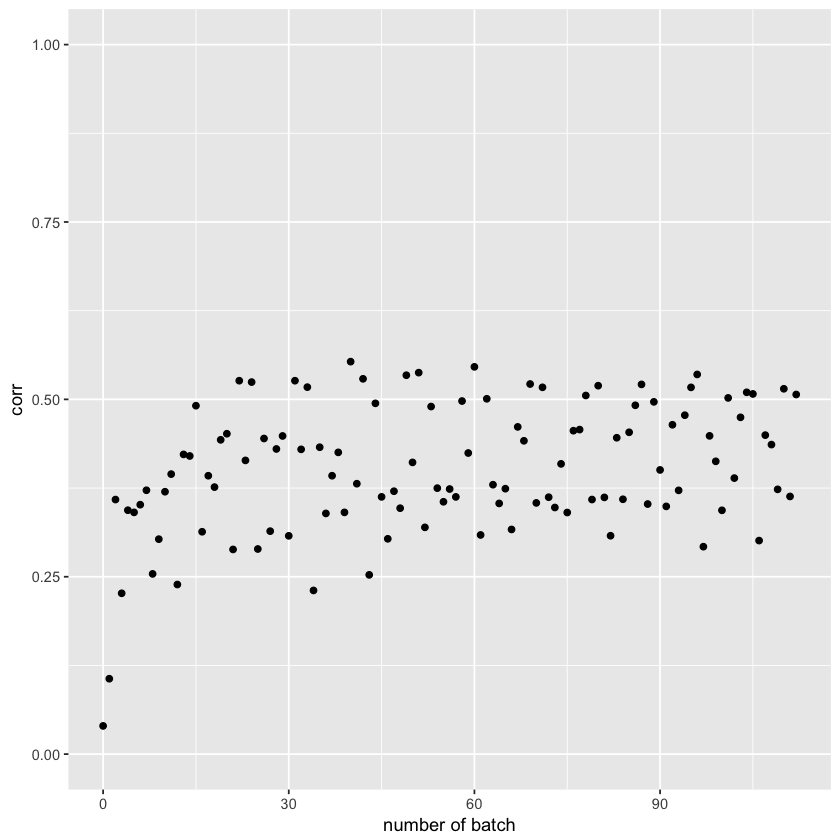

In [3]:
p_corr = ggplot(corr, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

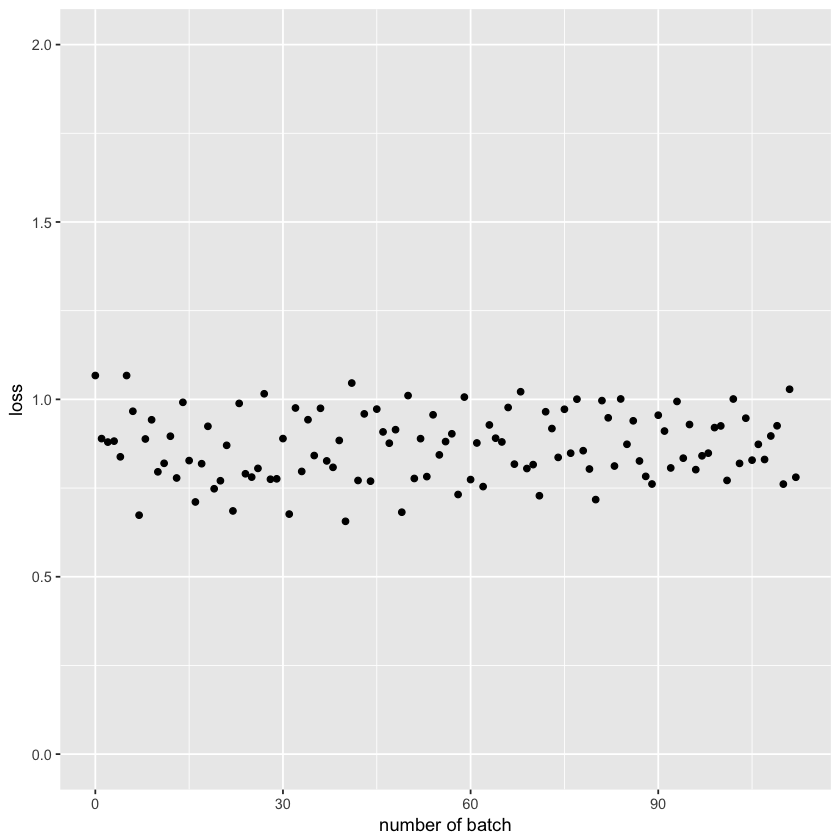

In [4]:
p_loss = ggplot(loss, aes(x = V1, y = V2))
p_loss + geom_point() + xlab("number of batch") + ylab("loss") + ylim(0, max(loss$V2, 2))

In [ ]:
idea: benutze dropout statt BatchNorm, BN braucht extra zwei Parameters für jeden Unit. 
BasicLinear_dropout (
  (layers): Sequential (
    (fc1): Linear (1000 -> 100)
    (LeakyReLU1): LeakyReLU (0.01)
    (fc2): Linear (100 -> 10)
    (LeakyReLU2): LeakyReLU (0.01)
    (drop_out): Dropout (p = 0.568304009009)
    (fc3): Linear (10 -> 1)
  )
)

In [2]:
opt = Params.Params()
pas = {'tgt': '../data/MasterArbeit/data/data_scores', 'src_sys': '../data/MasterArbeit/test/train_sys_hidden', 'src_ref': '../data/MasterArbeit/test/train_ref_hidden', 'val_tgt': '../data/MasterArbeit/test/val_scores', 'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden', 'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden', 'test_tgt': '../data/MasterArbeit/test/test_scores', 'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden', 'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden', 'batch_size': 100, 'dim2': 100, 'dim3': 10, 'lr': 0.01592636698766986, 'act_func': 'LeakyReLU', 'act_func_out': None, 'model': 'BasicLinearDropout', 'type': 'linear', 'momentum': 0.19338528925355508, 'drop_out_rate': 0.5683040090088415}
opt.set_params(pas)
fmin.o_func(pas)

('act_func_out', None)
('tgt', '../data/MasterArbeit/data/data_scores')
('loss_fn', 'MSELoss')
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 100)
('dim3', 10)
('val_tgt', '../data/MasterArbeit/test/val_scores')
('test_tgt', '../data/MasterArbeit/test/test_scores')
('weight_decay', 0)
('out', './test_data/pred')
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('lr', 0.01592636698766986)
('act_func', 'LeakyReLU')
('drop_out_rate', 0.5683040090088415)
('type', 'linear')
('momentum', 0.19338528925355508)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('src_ref', '../data/MasterArbeit/test/train_ref_hidden')
('eps', 1e-08)
('model', 'BasicLinearDropout')
BasicLinear_dropout (
  (layers): Sequential (
    (fc1): Linear (1000 -> 100)
    (LeakyReLU1): LeakyReLU (0.01)
    (fc2): Linear (1

evaluate 88
the correlation coeffizient is : 0.007965
the mean loss is 0.751971
evaluate 89
the correlation coeffizient is : 0.105260
the mean loss is 0.945337
evaluate 90
the correlation coeffizient is : 0.108761
the mean loss is 0.995884
evaluate 91
the correlation coeffizient is : 0.212886
the mean loss is 0.909393
evaluate 92
the correlation coeffizient is : 0.297159
the mean loss is 0.976765
evaluate 93
the correlation coeffizient is : 0.225313
the mean loss is 0.924388
evaluate 94
the correlation coeffizient is : 0.137459
the mean loss is 0.871829
evaluate 95
the correlation coeffizient is : 0.129197
the mean loss is 1.175973
evaluate 96
the correlation coeffizient is : 0.284530
the mean loss is 1.063949
evaluate 97
the correlation coeffizient is : 0.062981
the mean loss is 0.757138
evaluate 98
the correlation coeffizient is : 0.270343
the mean loss is 0.929729
evaluate 99
the correlation coeffizient is : 0.002877
the mean loss is 0.976062
evaluate 100
the correlation coeffizient

0.809932582211496

### other models

In [ ]:
idea: Anzahle der Parameters reduzieren
BiLinear (
  (li_sys): Linear (500 -> 500)
  (li_ref): Linear (500 -> 500)
  (act_func): LeakyReLU (0.01)
  (fc): Linear (500 -> 10)
  (drop_out): Dropout (p = 0.5)
  (li_out): Linear (10 -> 1)
)

In [2]:
opt = Params.Params()
pas = {'dim2': 10, 'act_func_out': None, 'tgt': '../data/MasterArbeit/data/data_scores', 'src_sys': '../data/MasterArbeit/test/train_sys_hidden', 'src_ref': '../data/MasterArbeit/test/train_ref_hidden', 'val_tgt': '../data/MasterArbeit/test/val_scores', 'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden', 'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden', 'test_tgt': '../data/MasterArbeit/test/test_scores', 'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden', 'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden', 'batch_size': 100, 'lr': 0.01592636698766986, 'act_func': 'LeakyReLU', 'act_func_out': None , 'model': 'BiLinear'}
opt.set_params(pas)
fmin.o_func(pas)

('act_func_out', None)
('tgt', '../data/MasterArbeit/data/data_scores')
('loss_fn', 'MSELoss')
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 10)
('dim3', None)
('val_tgt', '../data/MasterArbeit/test/val_scores')
('test_tgt', '../data/MasterArbeit/test/test_scores')
('weight_decay', 0)
('out', './test_data/pred')
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('lr', 0.01592636698766986)
('act_func', 'LeakyReLU')
('drop_out_rate', 0.5)
('momentum', 0.1)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('src_ref', '../data/MasterArbeit/test/train_ref_hidden')
('eps', 1e-08)
('model', 'BiLinear')
BiLinear (
  (li_sys): Linear (500 -> 500)
  (li_ref): Linear (500 -> 500)
  (act_func): LeakyReLU (0.01)
  (fc): Linear (500 -> 10)
  (drop_out): Dropout (p = 0.5)
  (li_out): Linear (10 -> 1)

evaluate 90
the correlation coeffizient is : 0.353697
the mean loss is 0.897173
evaluate 91
the correlation coeffizient is : 0.294449
the mean loss is 0.809403
evaluate 92
the correlation coeffizient is : 0.264209
the mean loss is 0.998396
evaluate 93
the correlation coeffizient is : 0.442020
the mean loss is 0.804137
evaluate 94
the correlation coeffizient is : 0.416798
the mean loss is 0.737473
evaluate 95
the correlation coeffizient is : 0.458779
the mean loss is 0.987559
evaluate 96
the correlation coeffizient is : 0.304674
the mean loss is 0.886954
evaluate 97
the correlation coeffizient is : 0.271666
the mean loss is 0.907269
evaluate 98
the correlation coeffizient is : 0.402832
the mean loss is 0.812214
evaluate 99
the correlation coeffizient is : 0.375330
the mean loss is 0.878019
evaluate 100
the correlation coeffizient is : 0.413431
the mean loss is 0.719401
evaluate 101
the correlation coeffizient is : 0.402797
the mean loss is 0.931927
evaluate 102
the correlation coeffizie

0.64278840092910028

In [1]:
library(ggplot2)
loss = read.table('../data/MasterArbeit/mid_result/loss', header = FALSE, sep = ',')
corr = read.table('../data/MasterArbeit/mid_result/corr', header = FALSE, sep = ',')

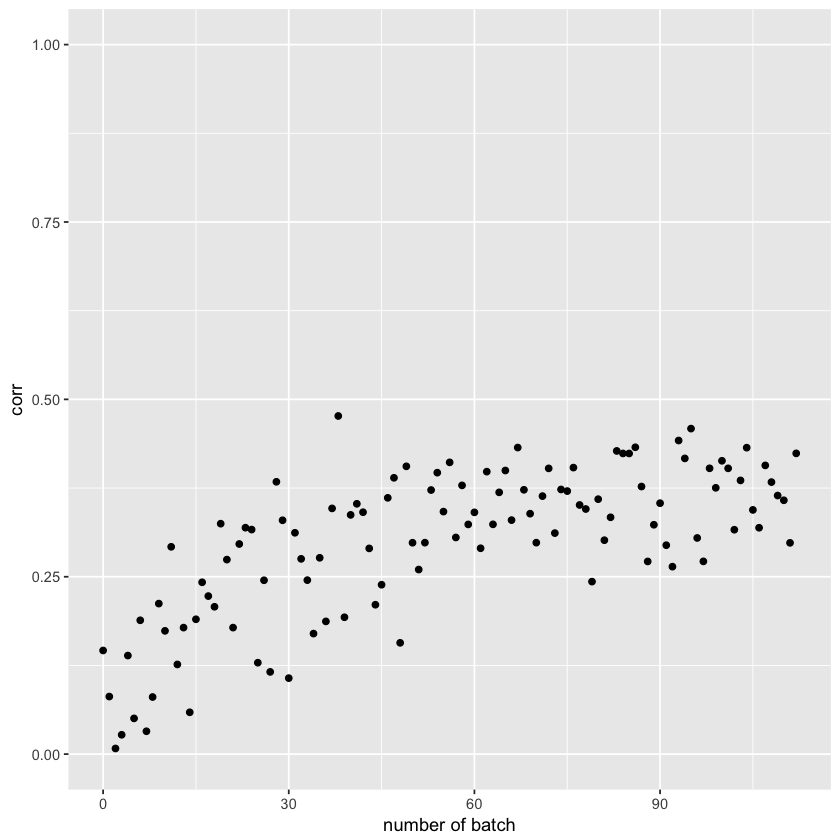

In [2]:
p_corr = ggplot(corr, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

In [ ]:
idea: nicht alle Demensionen in hidden value vector sind für die evaluation wichtig. 
MaskedModel1 (
  (li_mask): Linear (500 -> 500)
  (sf): Softmax ()
  (li_1): Linear (500 -> 10)
  (act_func): Tanh ()
  (li_out): Linear (10 -> 1)
)

In [3]:
opt = Params.Params()
pas = {'dim2': 10, 'act_func_out': None, 'tgt': '../data/MasterArbeit/data/data_scores', 'src_sys': '../data/MasterArbeit/test/train_sys_hidden', 'src_ref': '../data/MasterArbeit/test/train_ref_hidden', 'val_tgt': '../data/MasterArbeit/test/val_scores', 'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden', 'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden', 'test_tgt': '../data/MasterArbeit/test/test_scores', 'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden', 'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden', 'batch_size': 100, 'lr': 0.005592636698766986, 'act_func': 'Tanh', 'model': 'MaskedModel1'}
opt.set_params(pas)
fmin.o_func(pas)

('act_func_out', None)
('tgt', '../data/MasterArbeit/data/data_scores')
('loss_fn', 'MSELoss')
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 10)
('dim3', None)
('val_tgt', '../data/MasterArbeit/test/val_scores')
('test_tgt', '../data/MasterArbeit/test/test_scores')
('weight_decay', 0)
('out', './test_data/pred')
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('lr', 0.005592636698766986)
('act_func', 'Tanh')
('drop_out_rate', 0.5)
('momentum', 0.1)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('src_ref', '../data/MasterArbeit/test/train_ref_hidden')
('eps', 1e-08)
('model', 'MaskedModel1')
MaskedModel1 (
  (li_mask): Linear (500 -> 500)
  (sf): Softmax ()
  (li_1): Linear (500 -> 10)
  (act_func): Tanh ()
  (li_out): Linear (10 -> 1)
)
number of batch is 75 
number of val batch 9

evaluate 91
the correlation coeffizient is : 0.311678
the mean loss is 0.849187
evaluate 92
the correlation coeffizient is : 0.323037
the mean loss is 0.944717
evaluate 93
the correlation coeffizient is : 0.387145
the mean loss is 0.800613
evaluate 94
the correlation coeffizient is : 0.442000
the mean loss is 0.761909
evaluate 95
the correlation coeffizient is : 0.347121
the mean loss is 1.064901
evaluate 96
the correlation coeffizient is : 0.492617
the mean loss is 0.809159
evaluate 97
the correlation coeffizient is : 0.334391
the mean loss is 0.729851
evaluate 98
the correlation coeffizient is : 0.404010
the mean loss is 0.809200
evaluate 99
the correlation coeffizient is : 0.358038
the mean loss is 0.881373
evaluate 100
the correlation coeffizient is : 0.297180
the mean loss is 0.957594
evaluate 101
the correlation coeffizient is : 0.357993
the mean loss is 0.887333
evaluate 102
the correlation coeffizient is : 0.382352
the mean loss is 0.798622
evaluate 103
the correlation coeffizi

0.65821116538360724

In [1]:
library(ggplot2)
loss = read.table('../data/MasterArbeit/mid_result/loss', header = FALSE, sep = ',')
corr = read.table('../data/MasterArbeit/mid_result/corr', header = FALSE, sep = ',')

Warning message:
“Removed 2 rows containing missing values (geom_point).”

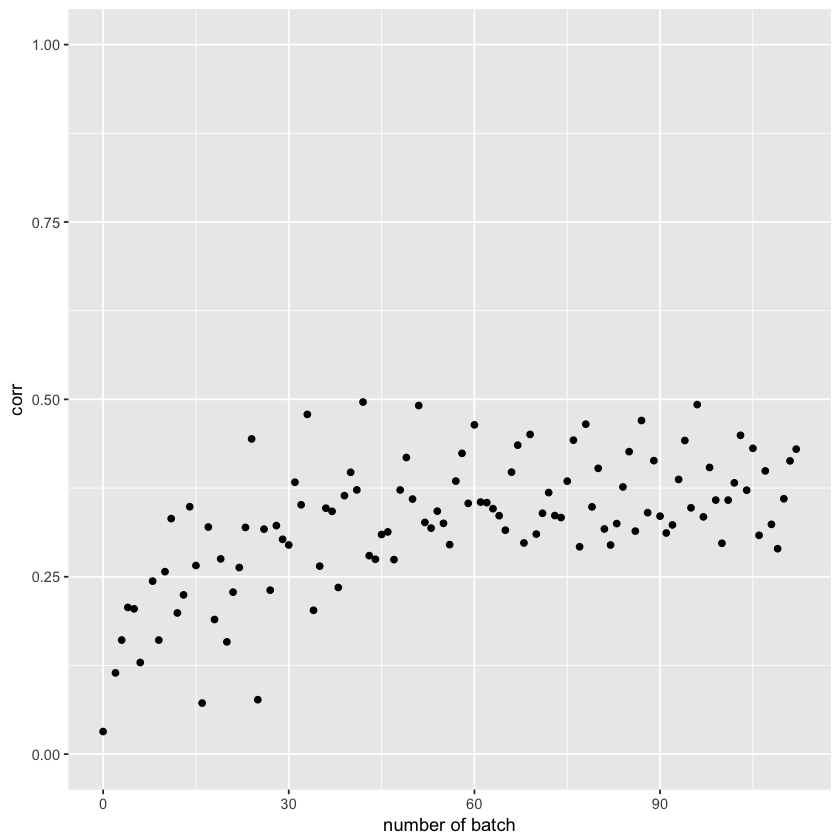

In [2]:
p_corr = ggplot(corr, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

### random test
the results shown above is bad. I'm not sure if the model has learned something. so i try to use the random data to train the model, and compare the results below

In [2]:
import fmin
import Params

opt = Params.Params()
# Random Test
pas = {
      'tgt': '../data/MasterArbeit/test/train_scores',
      'src_sys': '../data/MasterArbeit/test/train_sys_hidden',
      'src_ref': '../data/MasterArbeit/test/train_ref_hidden',
      'tgt_val': '../data/MasterArbeit/test/val_scores',
      'src_val_sys': '../data/MasterArbeit/test/val_sys_hidden',
      'src_val_ref': '../data/MasterArbeit/test/val_ref_hidden',
      'tgt_test': '../data/MasterArbeit/test/test_scores',
      'src_test_sys': '../data/MasterArbeit/test/test_sys_hidden',
      'src_test_ref': '../data/MasterArbeit/test/test_ref_hidden',
      'optim': 'Adam',
      'loss_fn': 'MSELoss', 
      'batch_size': 100, 
      'dim2': 100, 
      'dim3': 10, 
      'lr': 0.00592636698766986, 
      'act_func': 'LeakyReLU', 
      'act_func_out': None, 
      'model': './model/LinearModel',
      'type': 'linear', 
      'momentum': 0.19338528925355508, 
      'drop_out_rate': 0.5683040090088415,
      'isRandom': True
}
opt.set_params(pas)
fmin.o_func(pas)

('act_func1', 'LeakyReLU')
('act_func_out', None)
('tgt', '../data/MasterArbeit/test/train_scores')
('loss_fn', 'MSELoss')
('isRandom', True)
('src_test_sys', '../data/MasterArbeit/test/test_sys_hidden')
('dim2', 100)
('dim3', 10)
('dim1', 20)
('weight_decay', 0)
('out', './pred')
('kernel_size2', 3)
('kernel_size1', 3)
('src_test_ref', '../data/MasterArbeit/test/test_ref_hidden')
('tgt_test', '../data/MasterArbeit/test/test_scores')
('checkpoint', './checkpoints/cp1')
('num_dim_k', 64)
('tgt_val', '../data/MasterArbeit/test/val_scores')
('lr', 0.00592636698766986)
('act_func', 'LeakyReLU')
('drop_out_rate', 0.5683040090088415)
('type', 'linear')
('momentum', 0.19338528925355508)
('src_val_ref', '../data/MasterArbeit/test/val_ref_hidden')
('resume', False)
('optim', 'Adam')
('batch_size', 100)
('src_val_sys', '../data/MasterArbeit/test/val_sys_hidden')
('num_head', 8)
('num_dim_v', 64)
('stride2', 2)
('src_sys', '../data/MasterArbeit/test/train_sys_hidden')
('act_func2', 'LeakyReLU')
(

evaluate 46
the correlation coeffizient is : 0.036081
the mean loss is 0.903598
save checkpoint 46
please remove the comment sign before saving a checkpoint
evaluate 47
the correlation coeffizient is : 0.166352
the mean loss is 0.961106
save checkpoint 47
please remove the comment sign before saving a checkpoint
evaluate 48
the correlation coeffizient is : 0.183082
the mean loss is 0.915209
save checkpoint 48
please remove the comment sign before saving a checkpoint
evaluate 49
the correlation coeffizient is : 0.114827
the mean loss is 0.921371
save checkpoint 49
please remove the comment sign before saving a checkpoint
evaluate 50
the correlation coeffizient is : 0.319844
the mean loss is 1.172562
save checkpoint 50
please remove the comment sign before saving a checkpoint
evaluate 51
the correlation coeffizient is : 0.225981
the mean loss is 1.067088
save checkpoint 51
please remove the comment sign before saving a checkpoint
evaluate 52
the correlation coeffizient is : 0.083917
the 

evaluate 102
the correlation coeffizient is : -0.174413
the mean loss is 0.929143
save checkpoint 102
please remove the comment sign before saving a checkpoint
evaluate 103
the correlation coeffizient is : -0.025578
the mean loss is 0.926399
save checkpoint 103
please remove the comment sign before saving a checkpoint
evaluate 104
the correlation coeffizient is : -0.254272
the mean loss is 1.197851
save checkpoint 104
please remove the comment sign before saving a checkpoint
evaluate 105
the correlation coeffizient is : -0.170428
the mean loss is 1.082443
save checkpoint 105
please remove the comment sign before saving a checkpoint
evaluate 106
the correlation coeffizient is : -0.114185
the mean loss is 0.799418
save checkpoint 106
please remove the comment sign before saving a checkpoint
evaluate 107
the correlation coeffizient is : -0.079444
the mean loss is 0.962486
save checkpoint 107
please remove the comment sign before saving a checkpoint
evaluate 108
the correlation coeffizient

1.0610884648737717

In [1]:
library(ggplot2)
loss = read.table('../data/MasterArbeit/mid_result/loss', header = FALSE, sep = ',')
corr = read.table('../data/MasterArbeit/mid_result/corr', header = FALSE, sep = ',')

Warning message:
“Removed 43 rows containing missing values (geom_point).”

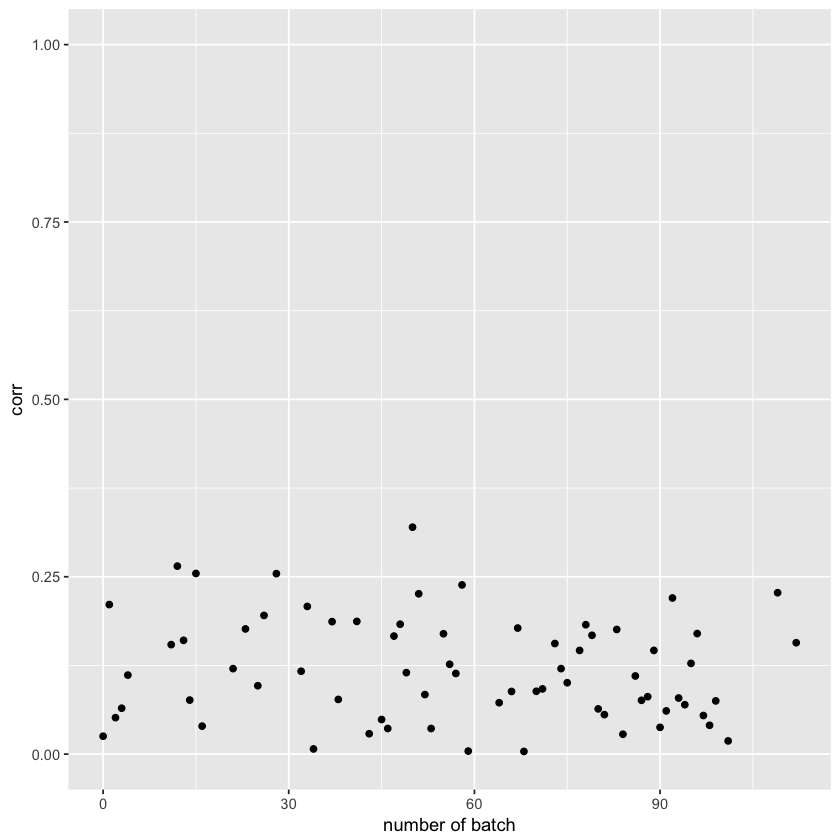

In [2]:
p_corr = ggplot(corr, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

Warning message:
“Removed 37 rows containing missing values (geom_point).”

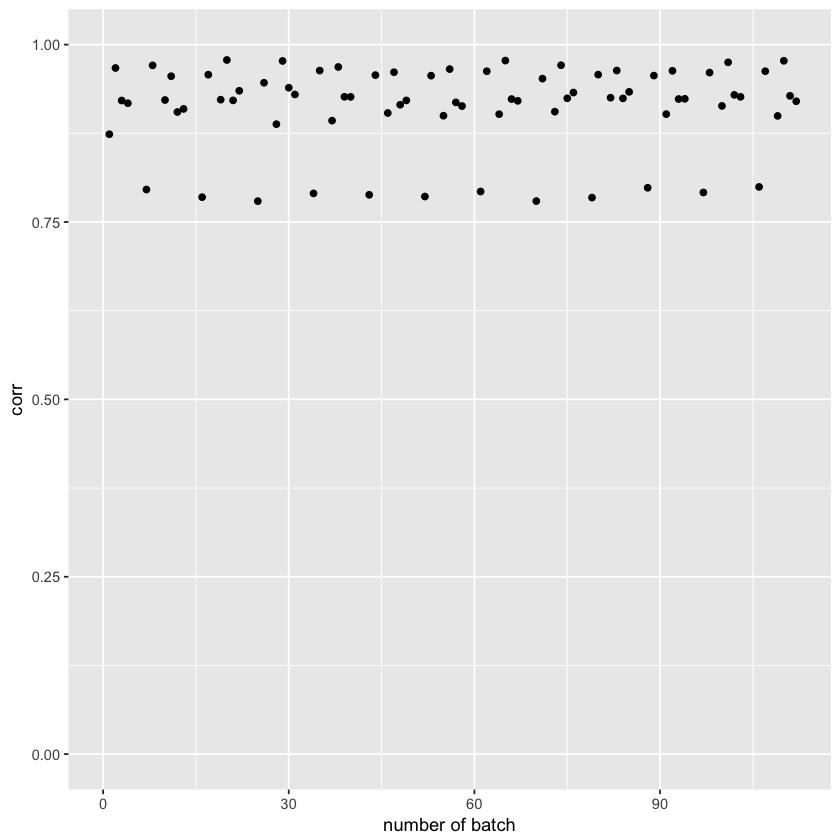

In [3]:
p_corr = ggplot(loss, aes(x = V1, y = V2))
p_corr + geom_point() + xlab("number of batch") + ylab("corr") + ylim(0.0, 1.0)

we can see that the corr of the new model is not train.<br>
a problem is that the loss value stay the same as the other models.